In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor

In [3]:


X = np.sort(10 * np.random.rand(500, 1), axis=0)
y = np.sin(X).ravel() + 0.2 * np.random.randn(500)
X_train, X_test, y_train, y_test = X[:400], X[400:], y[:400], y[400:]


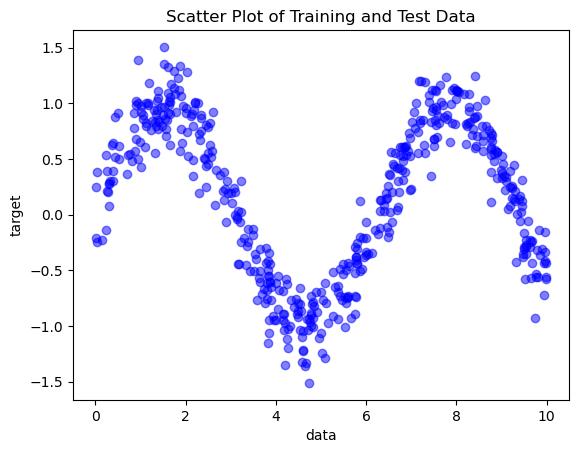

In [4]:

# Scatter plot for test data
plt.scatter(X, y, label='Test Data', color='blue', alpha=0.5)

plt.title('Scatter Plot of Training and Test Data')
plt.xlabel('data')
plt.ylabel('target')
plt.show()

In [5]:

# Train a decision tree model with depth 2
tree_reg_depth2 = DecisionTreeRegressor(max_depth=2)
tree_reg_depth2.fit(X_train, y_train)
# Train a decision tree model with depth 10
tree_reg_depth10 = DecisionTreeRegressor(max_depth=10)
tree_reg_depth10.fit(X_train, y_train)





DecisionTreeRegressor(max_depth=10)

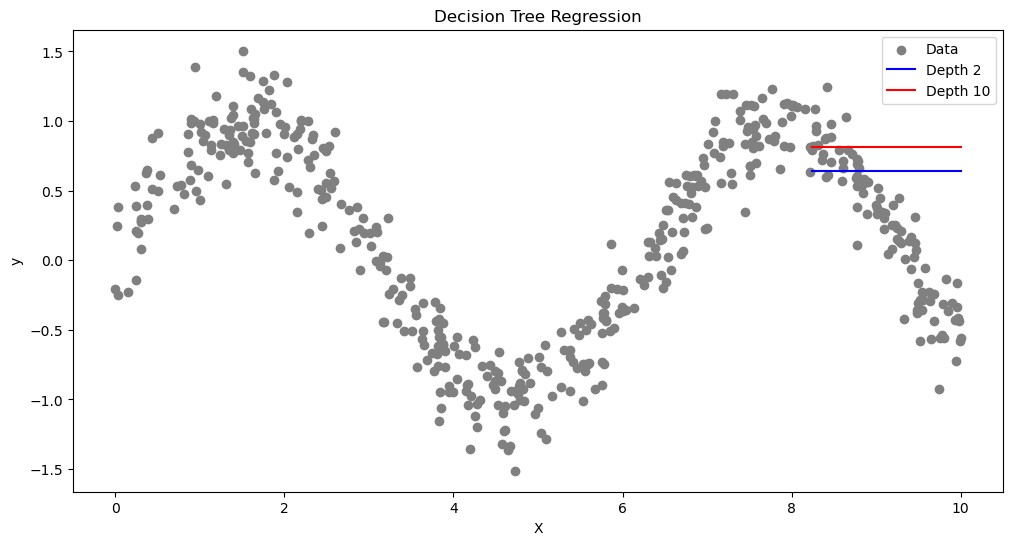

In [6]:


# Predictions for depth 2 model
y_pred_depth2 = tree_reg_depth2.predict(X_test)

# Predictions for depth 10 model
y_pred_depth10 = tree_reg_depth10.predict(X_test)

# Plot the results
plt.figure(figsize=(12, 6))

# Actual data points
plt.scatter(X, y, c='gray', label='Data')


# Predictions for depth 2 model
plt.plot(X_test, y_pred_depth2, color='blue',  label='Depth 2')

# Predictions for depth 10 model
plt.plot(X_test, y_pred_depth10, color='red', label='Depth 10')

plt.xlabel('X')
plt.ylabel('y')
plt.title('Decision Tree Regression')
plt.legend()
plt.show()

In [7]:
from sklearn.metrics import mean_squared_error, r2_score


# Calculate Mean Squared Error
mse_depth_2 = mean_squared_error(y_test, y_pred_depth2)
mse_depth_10 = mean_squared_error(y_test, y_pred_depth10)

# Calculate R-squared
r2_depth_2 = r2_score(y_test, y_pred_depth2)
r2_depth_10 = r2_score(y_test, y_pred_depth10)

print(f"Model with depth 2 - MSE: {mse_depth_2}, R-squared: {r2_depth_2}")
print(f"Model with depth 10 - MSE: {mse_depth_10}, R-squared: {r2_depth_10}")


Model with depth 2 - MSE: 0.4427494724187794, R-squared: -0.7744531245490072
Model with depth 10 - MSE: 0.6170905393912569, R-squared: -1.473177957209923


In [8]:
model_depth_7 = DecisionTreeRegressor(max_depth=7)  # Change the depth to 7
model_depth_7.fit(X_train, y_train)

# Assuming you have trained the model already
y_pred_depth_7 = model_depth_7.predict(X_test)

# Calculate Mean Squared Error
mse_depth_7 = mean_squared_error(y_test, y_pred_depth_7)

# Calculate R-squared
r2_depth_7 = r2_score(y_test, y_pred_depth_7)

print(f"Model with depth 7 - MSE: {mse_depth_7}, R-squared: {r2_depth_7}")


Model with depth 7 - MSE: 0.6170905393912569, R-squared: -1.473177957209923


In [9]:
min_samples_split = DecisionTreeRegressor(min_samples_split=10)  # Use min_samples_split
min_samples_split.fit(X_train, y_train)

# Assuming you have trained the model already
y_pred_min_samples_split = min_samples_split.predict(X_test)

# Calculate Mean Squared Error
mse_min_samples_split = mean_squared_error(y_test, y_pred_min_samples_split)

# Calculate R-squared
r2_min_samples_split = r2_score(y_test, y_pred_min_samples_split)

print(f"Model with min_samples_split=10 - MSE: {mse_min_samples_split}, R-squared: {r2_min_samples_split}")


Model with min_samples_split=10 - MSE: 0.5162975330963369, R-squared: -1.0692193393133915


In [10]:
from sklearn.ensemble import RandomForestRegressor
random_forest = RandomForestRegressor(max_depth=10, n_estimators=100)  # Use Random Forest
random_forest.fit(X_train, y_train)

y_pred_random_forest = random_forest.predict(X_test)

# Calculate Mean Squared Error
mse_random_forest = mean_squared_error(y_test, y_pred_random_forest)

# Calculate R-squared
r2_random_forest = r2_score(y_test, y_pred_random_forest)

print(f"Random Forest Model with depth 10 - MSE: {mse_random_forest}, R-squared: {r2_random_forest}")


Random Forest Model with depth 10 - MSE: 0.5957851188266202, R-squared: -1.3877900065835433


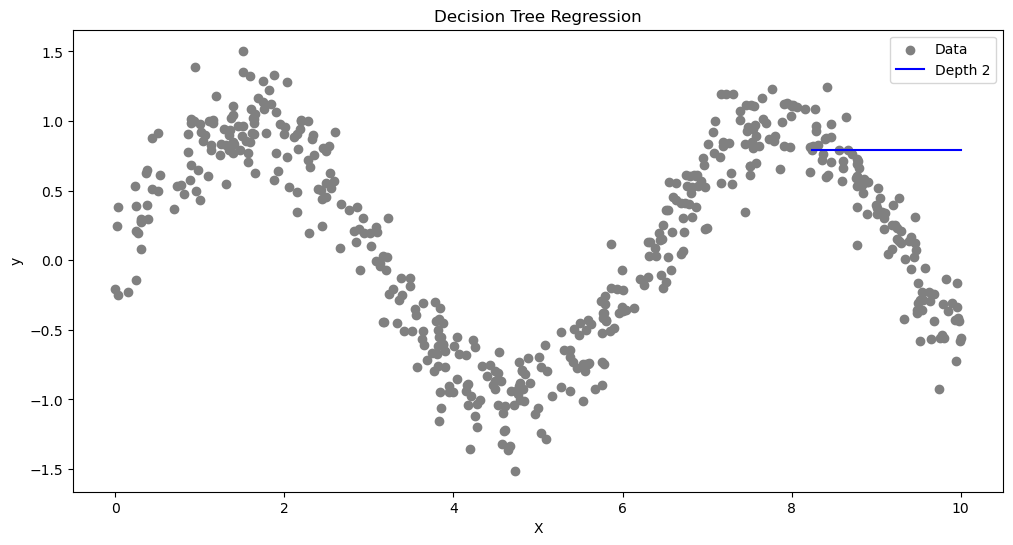

In [11]:
# Plot the results
plt.figure(figsize=(12, 6))

# Actual data points
plt.scatter(X, y, c='gray', label='Data')


# Predictions for depth 2 model
plt.plot(X_test, y_pred_random_forest, color='blue',  label='Depth 2')


plt.xlabel('X')
plt.ylabel('y')
plt.title('Decision Tree Regression')
plt.legend()
plt.show()

In [12]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

# Define the parameter grid for GridSearchCV
param_grid = {
    'max_depth': [5, 10, 15],
    'n_estimators': [50, 100, 200],
}

# Create the Random Forest regressor
rf = RandomForestRegressor()

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the model to find the best hyperparameters
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_max_depth = grid_search.best_params_['max_depth']
best_n_estimators = grid_search.best_params_['n_estimators']

print(f"Best Hyperparameters - max_depth: {best_max_depth}, n_estimators: {best_n_estimators}")

# Create a Random Forest model with the best hyperparameters
best_rf_model = RandomForestRegressor(max_depth=best_max_depth, n_estimators=best_n_estimators)

# Perform cross-validation to assess the model's performance
cv_scores = cross_val_score(best_rf_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
cv_mse_scores = -cv_scores  # Convert negative MSE scores to positive

print("Cross-Validation MSE Scores:", cv_mse_scores)
print("Mean Cross-Validation MSE:", np.mean(cv_mse_scores))

# Optionally, you can evaluate the model on the test data
best_rf_model.fit(X_train, y_train)
y_pred_test = best_rf_model.predict(X_test)
mse_test = mean_squared_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)

print(f"Test MSE: {mse_test}, Test R-squared: {r2_test}")


Best Hyperparameters - max_depth: 15, n_estimators: 100
Cross-Validation MSE Scores: [0.13297607 0.19465898 0.15313097 0.25335835 0.23773592]
Mean Cross-Validation MSE: 0.19437205688599984
Test MSE: 0.5932126781005844, Test R-squared: -1.377480168247443
